# Fire Prediction System

### Importing Libraries

In [392]:
import pandas as pd                                    #For Data Manipulation and Analysis (Dataframes)
import numpy as np                                     #For Numerical computing, making Arrays
import seaborn as sns                                  #For Statistical dats visualization
import matplotlib.pyplot as plt                        #For making plots and graphs
from sklearn.model_selection import train_test_split   #To Split dataset into train and test data
from sklearn.linear_model import LogisticRegression    #Predict probability of a binary outcome
from sklearn import metrics                            #Provides matrcs to evaluate the performance of machine learning models such as accuracy
from sklearn.metrics import confusion_matrix
import tkinter as tk
from tkinter import ttk, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

### Data Analysis

In [393]:
dataframe = pd.read_csv('ourDataSheet.csv')            #Reads 'ourDataSheet.csv' from Pandas library and stores it in Dataframe object called 'dataframe'


In [394]:
dataframe.tail(5)                                      #Display the last 5 rows of the dataset

DATE and Time     T1     H1   S1   G1   F1     L1    T2     H2  \
2885  2023-09-16 14:40:11  35.02  58.80  0.0  0.0  0.0  20.83  34.8  54.10   
2886  2023-09-16 14:40:16  35.02  58.78  0.0  0.0  0.0  20.83  34.8  54.10   
2887  2023-09-16 14:40:22  35.02  58.77  0.0  0.0  0.0  20.83  34.8  54.12   
2888  2023-09-16 14:40:27  35.02  58.76  0.0  0.0  0.0  20.83  34.8  54.12   
2889  2023-09-16 14:40:33  35.02  58.78  0.0  0.0  0.0  20.83  34.8  54.15   

       S2   G2   F2     L2     T3     H3   S3    G3   F3     L3     T4     H4  \
2885  0.0  0.0  0.0  30.00  35.02  56.53  0.0   9.0  0.0  52.50  37.72  47.61   
2886  0.0  0.0  0.0  30.00  35.02  56.51  0.0   6.0  0.0  52.50  37.72  47.61   
2887  0.0  0.0  0.0  30.00  35.03  56.49  0.0  12.0  0.0  53.33  37.72  47.64   
2888  0.0  0.0  0.0  30.83  35.03  56.49  0.0   8.0  0.0  52.50  37.72  47.67   
2889  0.0  0.0  0.0  30.83  35.03  56.51  0.0   8.0  0.0  53.33  37.72  47.71   

       S4    G4   F4     L4  CLASS_LABEL  
2885  0.0  18.0  0.0  14.17            0  
2886  0.0  17.0  0.0  14.17            0  
2887  0.0  19.0  0.0  13.33            0  
2888  0.0  20.0  0.0  13.33            0  
2889  0.0  18.0  0.0  14.17            0

### Data Exploration

In [395]:
dataframe.shape                                        #Dimensionality of data frame (Rows, Columns)

(2890, 26)

In [396]:
dataframe.info()                                       #concise summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE and Time  2890 non-null   object 
 1   T1             2890 non-null   float64
 2   H1             2890 non-null   float64
 3   S1             2890 non-null   float64
 4   G1             2890 non-null   float64
 5   F1             2890 non-null   float64
 6   L1             2890 non-null   float64
 7   T2             2890 non-null   float64
 8   H2             2890 non-null   float64
 9   S2             2890 non-null   float64
 10  G2             2890 non-null   float64
 11  F2             2890 non-null   float64
 12  L2             2890 non-null   float64
 13  T3             2890 non-null   float64
 14  H3             2890 non-null   float64
 15  S3             2890 non-null   float64
 16  G3             2890 non-null   float64
 17  F3             2890 non-null   float64
 18  L3      

In [397]:
#Generate statistics of the numerical columns in the dataframe
dataframe.describe()                                         

T1           H1      S1           G1           F1  \
count  2890.000000  2890.000000  2890.0  2890.000000  2890.000000   
mean     36.107623    61.418810     0.0     0.136678   347.544637   
std       4.344675     9.521625     0.0     0.592737  1004.710687   
min      31.170000    37.200000     0.0     0.000000     0.000000   
25%      32.180000    54.380000     0.0     0.000000     0.000000   
50%      35.010000    61.455000     0.0     0.000000     0.000000   
75%      39.090000    69.570000     0.0     0.000000     0.000000   
max      47.960000    77.190000     0.0    16.000000  4040.000000   

                L1           T2           H2      S2      G2           F2  \
count  2890.000000  2890.000000  2890.000000  2890.0  2890.0  2890.000000   
mean      4.615104    34.161080    54.769291     0.0     0.0   267.001730   
std       6.748668     9.950986    19.241578     0.0     0.0   930.397356   
min       0.000000     0.000000     0.000000     0.0     0.0     0.000000   
25%       0.000000    32.280000    44.922500     0.0     0.0     0.000000   
50%       2.500000    33.570000    55.010000     0.0     0.0     0.000000   
75%       5.000000    40.150000    70.700000     0.0     0.0     0.000000   
max      29.170000    58.510000    77.680000     0.0     0.0  4090.000000   

                L2           T3           H3      S3           G3  \
count  2890.000000  2890.000000  2890.000000  2890.0  2890.000000   
mean     10.496194    36.525592    58.044976     0.0    30.492734   
std      14.173937     5.120369    11.625465     0.0    20.333890   
min       0.000000    29.900000    30.270000     0.0     0.000000   
25%       0.000000    32.020000    51.300000     0.0    12.000000   
50%       0.000000    35.000000    57.780000     0.0    17.000000   
75%      18.330000    39.880000    68.660000     0.0    50.000000   
max     175.000000    53.660000    79.130000     0.0   121.000000   

                F3           L3           T4           H4      S4  \
count  2890.000000  2890.000000  2890.000000  2890.000000  2890.0   
mean    206.370934     9.111536    38.978716    50.437896     0.0   
std     836.490500    16.109327     5.041529    10.729889     0.0   
min       0.000000     0.000000    30.280000    27.380000     0.0   
25%       0.000000     0.830000    34.630000    44.490000     0.0   
50%       0.000000     3.330000    37.800000    48.480000     0.0   
75%       0.000000     4.170000    41.715000    58.750000     0.0   
max    4095.000000    95.830000    53.890000    77.090000     0.0   

                G4           F4           L4  CLASS_LABEL  
count  2890.000000  2890.000000  2890.000000  2890.000000  
mean      5.841522   278.691003     7.763709     0.531488  
std       7.178470   894.217433    11.961805     0.499094  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000    10.000000     1.000000  
75%      11.000000     0.000000    13.330000     1.000000  
max      37.000000  4048.000000   175.000000     1.000000

### Data Cleaning

In [398]:
#Remove rows that contain missing values (NaN)
dataframe.dropna(inplace=True)  

#copy data for cleaning

dataframe_1 = dataframe.copy()

#gather all columns
comp_data = {}

# Prefixes to collect values for
prefixes = ['T', 'H', 'S', 'G', 'L', 'F']

# Loop through each prefix and collect all values from columns with that prefix
for prefix in prefixes:
    # Use a list comprehension to filter columns and flatten them into a single list
    columns = [col for col in dataframe_1.columns if col.startswith(prefix)]
    # Flatten all values from these columns into a single list
    comp_data[prefix] = dataframe_1[columns].values.flatten().tolist()

dataframe_1 = pd.DataFrame(comp_data)


# Filter out columns with at least one non-zero value and display the columns
#dataframe_1 = dataframe_1.loc[:, (dataframe_1 != 0).any()] 
dataframe_1

T      H    S      G       L       F
0      31.17  77.19  0.0    0.0    0.00     0.0
1      31.36  77.68  0.0    0.0    0.83     0.0
2      29.90  79.13  0.0   67.0    0.83     0.0
3      30.28  77.09  0.0   16.0    0.00     0.0
4      31.19  77.07  0.0    0.0    0.00     0.0
5      31.39  77.54  0.0    0.0    0.83     0.0
6      29.90  79.05  0.0   65.0    1.67     0.0
7      30.29  77.01  0.0   19.0    0.00     0.0
8      31.22  76.97  0.0    0.0    0.00     0.0
9      31.42  77.46  0.0    0.0    0.83     0.0
10     29.90  78.95  0.0   64.0    1.67     0.0
11     30.30  76.92  0.0   19.0    0.00     0.0
12     31.25  76.90  0.0    0.0    0.00     0.0
13     31.45  77.37  0.0    0.0    0.83     0.0
14     29.91  78.90  0.0   59.0    1.67     0.0
15     30.31  76.86  0.0   17.0    0.00     0.0
16     31.28  76.83  0.0    0.0    0.00     0.0
17     31.47  77.28  0.0    0.0    0.83     0.0
18     29.92  78.84  0.0   59.0    0.83     0.0
19     30.33  76.82  0.0   17.0    0.00     0.0
20     31.30  76.78  0.0    0.0    0.00     0.0
21     31.50  77.20  0.0    0.0    0.83     0.0
22     29.92  78.81  0.0   59.0    1.67     0.0
23     30.35  76.75  0.0   16.0    0.00     0.0
24     31.32  76.74  0.0    0.0    0.00     0.0
25     31.52  77.13  0.0    0.0    0.00     0.0
26     29.94  78.76  0.0   55.0    0.83     0.0
27     30.36  76.71  0.0   16.0    0.00     0.0
28     31.34  76.72  0.0    0.0    0.00     0.0
29     31.54  77.08  0.0    0.0    0.00     0.0
30     29.95  78.72  0.0   54.0    1.67     0.0
31     30.38  76.65  0.0   17.0    0.00     0.0
32     31.36  76.67  0.0    0.0    0.00     0.0
33     31.55  77.02  0.0    0.0    0.00     0.0
34     29.96  78.67  0.0   53.0    1.67     0.0
35     30.40  76.61  0.0   15.0    0.00     0.0
36     31.38  76.61  0.0    0.0    0.00     0.0
37     31.57  76.97  0.0    0.0    0.00     0.0
38     29.97  78.64  0.0   27.0    0.83     0.0
39     30.42  76.56  0.0   16.0    0.00     0.0
40     31.40  76.57  0.0    0.0    0.00     0.0
41     31.59  76.92  0.0    0.0    0.00     0.0
42     29.98  78.61  0.0   51.0    0.83     0.0
43     30.44  76.54  0.0   15.0    0.00     0.0
44     31.41  76.55  0.0    0.0    0.00     0.0
45     31.60  76.88  0.0    0.0    0.00     0.0
46     29.99  78.56  0.0   51.0    0.83     0.0
47     30.46  76.50  0.0   15.0    0.00     0.0
48     31.43  76.50  0.0    0.0    0.00     0.0
49     31.62  76.80  0.0    0.0    0.00     0.0
50     30.00  78.53  0.0   50.0    0.83     0.0
51     30.48  76.48  0.0   16.0    0.00     0.0
52     31.45  76.47  0.0    0.0    0.00     0.0
53     31.63  76.77  0.0    0.0    0.00     0.0
54     30.01  78.51  0.0   53.0    0.83     0.0
55     30.49  76.42  0.0   12.0    0.00     0.0
56     31.46  76.42  0.0    0.0    0.00     0.0
57     31.64  76.73  0.0    0.0    0.00     0.0
58     30.02  78.47  0.0   52.0    0.83     0.0
59     30.51  76.39  0.0   14.0    0.00     0.0
60     31.47  76.39  0.0    0.0    0.00     0.0
61     31.65  76.70  0.0    0.0    0.00     0.0
62     30.04  78.45  0.0   49.0    0.83     0.0
63     30.53  76.35  0.0   15.0    0.00     0.0
64     31.49  76.36  0.0    0.0    0.00     0.0
65     31.67  76.69  0.0    0.0    0.00     0.0
66     30.05  78.40  0.0   50.0    0.83     0.0
67     30.54  76.30  0.0   14.0    0.00     0.0
68     31.50  76.31  0.0    0.0    0.00     0.0
69     31.68  76.68  0.0    0.0    0.00     0.0
70     30.06  78.38  0.0   48.0    0.83     0.0
71     30.56  76.28  0.0   15.0    0.00     0.0
72     31.51  76.29  0.0    0.0    0.00     0.0
73     31.69  76.63  0.0    0.0    0.00     0.0
74     30.07  78.35  0.0   55.0    0.83     0.0
75     30.58  76.25  0.0   13.0    0.00     0.0
76     31.53  76.25  0.0    0.0    0.00     0.0
77     31.70  76.61  0.0    0.0    0.00     0.0
78     30.08  78.34  0.0   50.0    0.83     0.0
79     30.60  76.22  0.0   11.0    0.00     0.0
80     31.54  76.22  0.0    0.0    0.00     0.0
81     31.71  76.57  0.0    0.0    0.00     0.0
82     30.09  78.30  0.0   

In [399]:
#Conditional statement to categories "CLASS_LABEL" column value as 'Fire' if equal to 1 else assign 'No Fire'
dataframe_1["F"] = np.where(dataframe_1["F"] >= 1, "Fire", "No Fire") 
dataframe_1

T      H    S      G       L        F
0      31.17  77.19  0.0    0.0    0.00  No Fire
1      31.36  77.68  0.0    0.0    0.83  No Fire
2      29.90  79.13  0.0   67.0    0.83  No Fire
3      30.28  77.09  0.0   16.0    0.00  No Fire
4      31.19  77.07  0.0    0.0    0.00  No Fire
5      31.39  77.54  0.0    0.0    0.83  No Fire
6      29.90  79.05  0.0   65.0    1.67  No Fire
7      30.29  77.01  0.0   19.0    0.00  No Fire
8      31.22  76.97  0.0    0.0    0.00  No Fire
9      31.42  77.46  0.0    0.0    0.83  No Fire
10     29.90  78.95  0.0   64.0    1.67  No Fire
11     30.30  76.92  0.0   19.0    0.00  No Fire
12     31.25  76.90  0.0    0.0    0.00  No Fire
13     31.45  77.37  0.0    0.0    0.83  No Fire
14     29.91  78.90  0.0   59.0    1.67  No Fire
15     30.31  76.86  0.0   17.0    0.00  No Fire
16     31.28  76.83  0.0    0.0    0.00  No Fire
17     31.47  77.28  0.0    0.0    0.83  No Fire
18     29.92  78.84  0.0   59.0    0.83  No Fire
19     30.33  76.82  0.0   17.0    0.00  No Fire
20     31.30  76.78  0.0    0.0    0.00  No Fire
21     31.50  77.20  0.0    0.0    0.83  No Fire
22     29.92  78.81  0.0   59.0    1.67  No Fire
23     30.35  76.75  0.0   16.0    0.00  No Fire
24     31.32  76.74  0.0    0.0    0.00  No Fire
25     31.52  77.13  0.0    0.0    0.00  No Fire
26     29.94  78.76  0.0   55.0    0.83  No Fire
27     30.36  76.71  0.0   16.0    0.00  No Fire
28     31.34  76.72  0.0    0.0    0.00  No Fire
29     31.54  77.08  0.0    0.0    0.00  No Fire
30     29.95  78.72  0.0   54.0    1.67  No Fire
31     30.38  76.65  0.0   17.0    0.00  No Fire
32     31.36  76.67  0.0    0.0    0.00  No Fire
33     31.55  77.02  0.0    0.0    0.00  No Fire
34     29.96  78.67  0.0   53.0    1.67  No Fire
35     30.40  76.61  0.0   15.0    0.00  No Fire
36     31.38  76.61  0.0    0.0    0.00  No Fire
37     31.57  76.97  0.0    0.0    0.00  No Fire
38     29.97  78.64  0.0   27.0    0.83  No Fire
39     30.42  76.56  0.0   16.0    0.00  No Fire
40     31.40  76.57  0.0    0.0    0.00  No Fire
41     31.59  76.92  0.0    0.0    0.00  No Fire
42     29.98  78.61  0.0   51.0    0.83  No Fire
43     30.44  76.54  0.0   15.0    0.00  No Fire
44     31.41  76.55  0.0    0.0    0.00  No Fire
45     31.60  76.88  0.0    0.0    0.00  No Fire
46     29.99  78.56  0.0   51.0    0.83  No Fire
47     30.46  76.50  0.0   15.0    0.00  No Fire
48     31.43  76.50  0.0    0.0    0.00  No Fire
49     31.62  76.80  0.0    0.0    0.00  No Fire
50     30.00  78.53  0.0   50.0    0.83  No Fire
51     30.48  76.48  0.0   16.0    0.00  No Fire
52     31.45  76.47  0.0    0.0    0.00  No Fire
53     31.63  76.77  0.0    0.0    0.00  No Fire
54     30.01  78.51  0.0   53.0    0.83  No Fire
55     30.49  76.42  0.0   12.0    0.00  No Fire
56     31.46  76.42  0.0    0.0    0.00  No Fire
57     31.64  76.73  0.0    0.0    0.00  No Fire
58     30.02  78.47  0.0   52.0    0.83  No Fire
59     30.51  76.39  0.0   14.0    0.00  No Fire
60     31.47  76.39  0.0    0.0    0.00  No Fire
61     31.65  76.70  0.0    0.0    0.00  No Fire
62     30.04  78.45  0.0   49.0    0.83  No Fire
63     30.53  76.35  0.0   15.0    0.00  No Fire
64     31.49  76.36  0.0    0.0    0.00  No Fire
65     31.67  76.69  0.0    0.0    0.00  No Fire
66     30.05  78.40  0.0   50.0    0.83  No Fire
67     30.54  76.30  0.0   14.0    0.00  No Fire
68     31.50  76.31  0.0    0.0    0.00  No Fire
69     31.68  76.68  0.0    0.0    0.00  No Fire
70     30.06  78.38  0.0   48.0    0.83  No Fire
71     30.56  76.28  0.0   15.0    0.00  No Fire
72     31.51  76.29  0.0    0.0    0.00  No Fire
73     31.69  76.63  0.0    0.0    0.00  No Fire
74     30.07  78.35  0.0   55.0    0.83  No Fire
75     30.58  76.25  0.0   13.0    0.00  No Fire
76     31.53  76.25  0.0    0.0    0.00  No Fire
77     31.70  76.61  0.0    0.0    0.00  No Fire
78     30.08  78.34  0.0   50.0    0.83  No Fire
79     30.60  76.22  0.0   11.0    0.00  No Fire
80     31.54  76.22  0.0    0.0    0.00  N

### Import & Train the model

In [400]:
np.random.seed(42)

X = dataframe_1.drop("F", axis=1)  #Store independent Variables
y = dataframe_1["F"]               #Stores dependent Variable / Variable to be predicted

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, stratify=dataframe_1["F"])
# Stratify: To ensure that the distribution of classes in the training and testing datasets remains similar to the distribution in the original dataset

In [401]:
model = LogisticRegression(penalty="l2", C=1.0, solver="liblinear")
model.fit(X_train, y_train)                  #This method is used to train (fit) a machine learning model using the training data.

LogisticRegression(solver='liblinear')

### Comparing the results

In [402]:
# Class Probabilities
pred_proba = model.predict_proba(X_test)
pred_proba

accuracy = model.score(X_test, y_test)
model.score(X_train, y_train)
print("Accuracy:", accuracy)

Accuracy: 0.9277681660899654


In [403]:
pred_class = model.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_class)
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

# Print the DataFrame
print("Confusion Matrix:")
print(conf_df)

Confusion Matrix:
            Predicted No  Predicted Yes
Actual No            123            114
Actual Yes            53           2022


In [404]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
X_test['Predicted_Class'] = pred_class
X_test['Actual_Class'] = y_test
y_test
X_test

T      H    S      G       L Predicted_Class Actual_Class
8975   47.74  33.18  0.0    0.0   14.17            Fire         Fire
6107   39.39  51.03  0.0   11.0   15.83         No Fire      No Fire
5532   34.49  68.87  0.0    0.0    2.50         No Fire      No Fire
4077   32.22  70.60  0.0    0.0    0.00         No Fire      No Fire
10833  34.80  53.63  0.0    0.0   26.67         No Fire      No Fire
5010   31.96  68.48  0.0   53.0    0.83         No Fire      No Fire
6456   37.81  60.95  0.0    0.0    4.17         No Fire      No Fire
3897   32.24  70.47  0.0    0.0    0.00         No Fire      No Fire
9589   41.35  42.17  0.0    0.0   17.50         No Fire      No Fire
10847  37.74  47.85  0.0   19.0   12.50         No Fire      No Fire
5476   31.88  69.21  0.0    0.0    0.00         No Fire      No Fire
1957   33.08  68.58  0.0    0.0    0.00         No Fire      No Fire
6111   39.51  50.66  0.0    7.0   15.83         No Fire      No Fire
1890   30.52  74.76  0.0   57.0    0.83         No Fire      No Fire
9461   41.14  42.85  0.0    0.0   19.17         No Fire      No Fire
1541   38.06  61.49  0.0    0.0    5.00         No Fire         Fire
6039   39.22  51.03  0.0   12.0   15.00         No Fire      No Fire
5673    0.00   0.00  0.0    0.0    0.00            Fire      No Fire
2253   32.56  69.97  0.0    0.0    0.00         No Fire      No Fire
4811   34.64  58.51  0.0    0.0    0.00         No Fire      No Fire
5408   31.88  69.23  0.0    0.0    0.00         No Fire      No Fire
9035   47.76  32.96  0.0    0.0   15.00            Fire         Fire
7626   41.27  48.72  0.0   10.0    7.50         No Fire         Fire
182    33.11  71.93  0.0   48.0    0.83         No Fire      No Fire
6915   40.56  48.17  0.0   10.0   14.17         No Fire      No Fire
7617   40.45  45.23  0.0    0.0   17.50         No Fire      No Fire
5581    0.00   0.00  0.0    0.0    0.00            Fire         Fire
5512   31.88  69.21  0.0    0.0    0.00         No Fire      No Fire
7708   43.90  42.74  0.0    0.0    2.50         No Fire      No Fire
2541   32.50  70.79  0.0    0.0    0.00         No Fire      No Fire
7632   45.84  39.71  0.0    0.0    3.33            Fire      No Fire
8776   39.08  54.00  0.0    0.0    3.33         No Fire      No Fire
4630   31.99  68.77  0.0   39.0    0.83         No Fire      No Fire
11432  35.16  59.25  0.0    0.0   19.17         No Fire      No Fire
8490   44.52  38.10  0.0    9.0    4.17         No Fire      No Fire
5212   31.88  69.15  0.0    0.0    0.00         No Fire      No Fire
2654   31.74  71.18  0.0   51.0    0.83         No Fire      No Fire
9896   34.48  61.03  0.0    0.0   17.50         No Fire      No Fire
10403  37.72  47.86  0.0   17.0   13.33         No Fire      No Fire
7265   41.03  44.49  0.0    0.0   19.17         No Fire      No Fire
213    32.27  74.67  0.0    0.0    0.00         No Fire      No Fire
10196  34.93  60.54  0.0    0.0   20.00         No Fire      No Fire
2213   32.59  69.70  0.0    0.0    0.00         No Fire      No Fire
7748   43.62  43.15  0.0    0.0    3.33         No Fire      No Fire
7109   41.58  43.43  0.0    0.0   19.17         No Fire      No Fire
5405   31.99  70.24  0.0    0.0    0.00         No Fire      No Fire
6884   44.98  46.40  0.0    0.0   10.00         No Fire         Fire
2998   31.96  70.01  0.0   48.0    0.83         No Fire      No Fire
8016   40.69  49.77  0.0    0.0    2.50         No Fire      No Fire
725    33.07  73.21  0.0    0.0    0.00         No Fire      No Fire
3505   32.29  70.89  0.0    0.0    0.00         No Fire      No Fire
869    33.08  72.58  0.0    0.0    0.00         No Fire      No Fire
7280   47.16  38.66  0.0    0.0    6.67            Fire         Fire
9159   48.06  32.49  0.0    0.0   15.00            Fire         Fire
125    32.02  75.10  0.0    0.0    0.00         No Fire      No Fire
1547   40.33  44.64  0.0    0.0    0.00         No Fire      No Fire
6344   37.20  62.16  0.0    0.0    4.17         No Fire         Fire
11073  34

In [405]:
#Code to convert farenheit input from the GUI into celsius for the prediction
def convert_temperature(temp, unit):
    if unit == 'Fahrenheit':
        # Convert Fahrenheit to Celsius
        temp_c = (5 / 9) * (temp - 32)
        return temp_c
    else:
        return temp

In [406]:
# function to determine the range of the values that can be inputed into the gui based on the dataset quartiles 
#by flooring and capping
def get_ranges(column):
    
    #Get ranges for the input based on the dataset
    Q1 = dataframe_1[column].quantile(0.25)
    Q3 = dataframe_1[column].quantile(0.75)
    
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    return [lower_bound if not lower_bound<0 else 0, upper_bound]

In [407]:
#Code to run the prediction based on the input parameters from the gui

def get_prediction(Temp,Humid,Light,Smoke,Gas,temp_unit):

    data = pd.DataFrame({
        'T': [Temp if temp_unit=="Celsius" else convert_temperature(Temp, 'Farenheit')],
        'H': [Humid],
        'S': [Smoke],
        'G': [Gas],
        'L': [Light]
        
    })
  

   
  
    prediction = model.predict(data)
    
    messagebox.showinfo("Prediction", f"There is: ${prediction[0]}" )
    



In [442]:

# code to generate analysis based on gui input
def get_analysis (Temp,Humid,Light,Smoke,Gas,temp_unit):
    data = pd.DataFrame({
        'Category': ['Temp', 'Humidity','Luminous Intensity', 'Smoke', 'Gasses'],
        'Values': [convert_temperature(Temp, temp_unit),Humid,Light,Smoke,Gas],
        'Ranges': [get_ranges('T'), get_ranges('L'), get_ranges('S'), get_ranges('G'), get_ranges('H')],
        'Median': [dataframe_1['T'].median(), dataframe_1['L'].median(), dataframe_1['S'].median(), dataframe_1['G'].median(), dataframe_1['H'].median()]
    })
    
    fig, axs = plt.subplots(nrows=len(data), figsize=(6, 8))
    
    # Loop through each row in the DataFrame to color graph based on proximity to the median
    for index, row in data.iterrows():
        # Initialize a new figure
        
    
        # Determine color based on the value compared to the median
        if row['Values'] == 'Humidity':
            if row['Values'] < row['Median'] - 10:
                color = 'red'
            elif row['Median'] - 10 <= row['Values'] <= row['Median'] + 10:
                color = 'yellow'
            else:
                color = 'green'
        else:
            if row['Values'] < row['Median'] - 10:
                color = 'green'
            elif row['Median'] - 10 <= row['Values'] <= row['Median'] + 10:
                color = 'yellow'
            else:
                color = 'red'
            
        # Create a barplot to show analysis
        ax = sns.barplot(x=[row['Values']], y=[row['Category']], orient='h', color=color, ax=axs[index])
        ax.set_xlim(min(row['Ranges']), max(row['Ranges']))  # Ensure the x-axis is consistent across all plots
        ax.axvline(row['Median'], color='blue', linestyle='--', label='Median')
        ax.set_title(f"Bar Chart of {row['Category']}")
        ax.set_xlabel(row['Category'])
        ax.set_ylabel('Values')
        ax.legend()
    
    plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
    

    result =  get_prediction(Temp,Humid,Light,Smoke,Gas,temp_unit)
    render_graphs(fig)
    
 

In [443]:
#might use another method because this is difficult to understand 
#code to show graphs on tkinter window
def render_graphs(fig):


    window = tk.Tk()
    window.title("Category Bar Plots")
    
    
    # Creating the Matplotlib canvas integrating the figure with the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=window)  
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)
    
    # Start the Tkinter event loop
    window.mainloop()

In [444]:
def string_is_float(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

<h1>GUI(GRAPHICAL USER INTERFACE)</h1>

In [445]:
#Function to validate input and check if the inputed values are floats and if the values inputed are in the correct ranges



def validate_inputs():
    errors = []  # array to coallate all input errors
    try:
        #Check if all inputs are filled up
        if humidity_entry.get() =="" or temp_entry.get() =="" or light_entry.get()=="" or smoke_entry.get()=="" or gas_entry.get()=="":
            raise ValueError("Please input a value in all boxes")
            
        # Code to check if the inputs are floats
        if string_is_float(humidity_entry.get()):
            humidity = float(humidity_entry.get())
        else:
            humidity = 0
            errors.append("Please enter a numeric input for humidity.")
    
        # Check if temperature entry is a float
        if string_is_float(temp_entry.get()):
            temperature = float(temp_entry.get())
        else:
            temperature = 0
            errors.append("Please enter a numeric input for temperature.")
    
        # Check if light entry is a float
       
        if string_is_float(light_entry.get()):
            light = float(light_entry.get())
        else:
            light = 0
            errors.append("Please enter a numeric input for light intensity.")
    
        # Check if smoke entry is a float
       
        if string_is_float(smoke_entry.get()):
            smoke = float(smoke_entry.get())
        else:
            smoke = 0
            errors.append("Please enter a numeric input for smoke level.")
    
        # Check if gas entry is a float
       
        if string_is_float(gas_entry.get()):
            gas = float(gas_entry.get())
        else:
             gas = 0
             errors.append("Please enter a numeric input for gas level.")

        temper_unit = temp_unit.get() #to get the value of the conversion unit for temperature in the GUI
        
        # Check ranges for each input
        Temp_range = get_ranges('T')
        Humd_range =get_ranges('H')
        Gas_range =get_ranges('G')
        Light_range =get_ranges('L')
       
        if not (min(Humd_range) <= humidity <= max(Humd_range)):
            errors.append(f"Humidity must be between {min(Humd_range)}% and {max(Humd_range)}%.")

        if temp_unit.get() == 'Celsius':
            if not (min(Temp_range) <= temperature <= max(Temp_range)):
                errors.append(f"Temperature in Celsius must be between {min(Temp_range)}°C and {max(Temp_range)}°C.")
        else:
            f_temp_min = (min(Temp_range) * 9 / 5) + 32
            f_temp_max = (max(Temp_range) * 9 / 5) + 32
            if not (f_temp_min <= temperature <= f_temp_max):
                errors.append(f"Temperature in Fahrenheit must be between {f_temp_min}°F and {f_temp_max}°F.")

        if not (min(Light_range) <= light <= max(Light_range)):
            errors.append(f"Light intensity must be between {min(Light_range)} lux and {max(Light_range)} lux.")
            
        
            
        if not (min(Gas_range) <= gas <= max(Gas_range)):
            errors.append(f"Gas level must be between {min(Gas_range)} and {max(Gas_range)} ppm.")

    except ValueError as e:
        # Catch any conversion errors from the input GUI
        errors.append(str(e))

        # Check if there are any errors collected and display them
    if errors:
        messagebox.showerror("Input Validation Errors", "\n".join(errors))
    else:
        get_analysis(temperature, humidity, light, smoke, gas, temper_unit)
            
   
    


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\hp\AppData\Local\Temp\ipykernel_9764\1275580594.py:35: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(min(row['Ranges']), max(row['Ranges']))  # Ensure the x-axis is cons

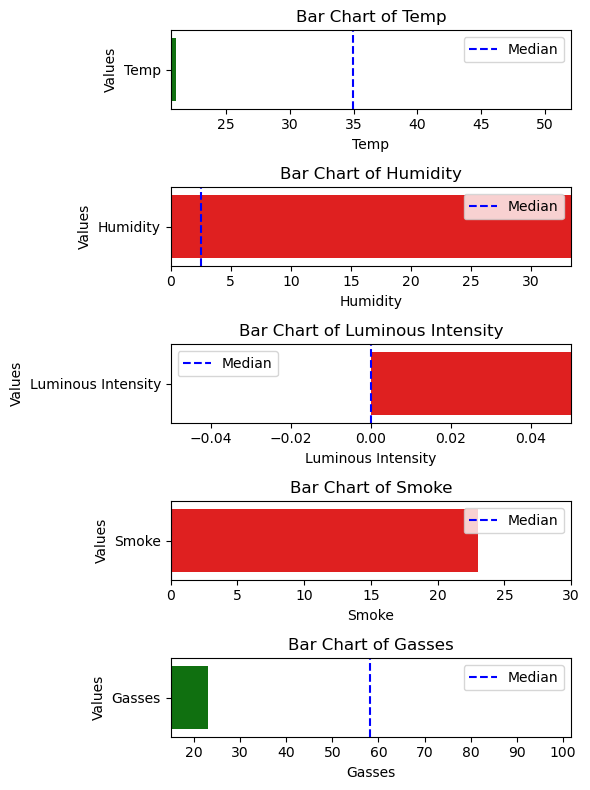

In [446]:

# Create the main window
window = tk.Tk()
window.title("Environmental Sensor Measurements")

# Create and place labels and entry Boxes
ttk.Label(window, text="Humidity (%):").grid(row=0, column=0, padx=10, pady=10)
humidity_entry = ttk.Entry(window)
humidity_entry.grid(row=0, column=1, padx=10, pady=10)

ttk.Label(window, text="Temperature:").grid(row=1, column=0, padx=10, pady=10)
temp_entry = ttk.Entry(window)
temp_entry.grid(row=1, column=1, padx=10, pady=10)

ttk.Label(window, text="Light Intensity (lux):").grid(row=2, column=0, padx=10, pady=10)
light_entry = ttk.Entry(window)
light_entry.grid(row=2, column=1, padx=10, pady=10)

ttk.Label(window, text="Smoke (ppm):").grid(row=3, column=0, padx=10, pady=10)
smoke_entry = ttk.Entry(window)
smoke_entry.grid(row=3, column=1, padx=10, pady=10)

ttk.Label(window, text="Gas (ppm):").grid(row=4, column=0, padx=10, pady=10)
gas_entry = ttk.Entry(window)
gas_entry.grid(row=4, column=1, padx=10, pady=10)

# Create checck boxes for different conversion units for temperature
temp_unit = tk.StringVar()
temp_unit.set("Celsius")
ttk.Checkbutton(window, text="Celsius", variable=temp_unit, onvalue="Celsius").grid(row=1, column=2)
ttk.Checkbutton(window, text="Fahrenheit", variable=temp_unit, onvalue="Fahrenheit").grid(row=1, column=3)

# Create a button to run the prediction
validate_button = ttk.Button(window, text="Run Prediction", command=validate_inputs)
validate_button.grid(row=5, columnspan=4, padx=20, pady=20)


window.mainloop()


<h1>GUI results analysis graph code</h1>